In [2]:
from constants import match_ids
from async_main import get_matches
import asyncio
from helper import sort_by_minute
from collections import defaultdict
import itertools

In [3]:
matches = await get_matches(match_ids=match_ids)

('Not goal: ', "Emerson Royal 62' Red Card")


In [16]:
arsenal_goals = []
for match in matches:
    if match.home.short == "ARS":
        arsenal_goals.extend(match.home_events)
    else:
        arsenal_goals.extend(match.away_events)

goals_sort_by_minute = sorted(arsenal_goals, key=sort_by_minute)

print(len(goals_sort_by_minute))
goals_dict = defaultdict(list)
for minute, group in itertools.groupby(goals_sort_by_minute, key=lambda goal: goal.minute):
    goals_dict[minute]=list(group)

66


<BarContainer object of 54 artists>

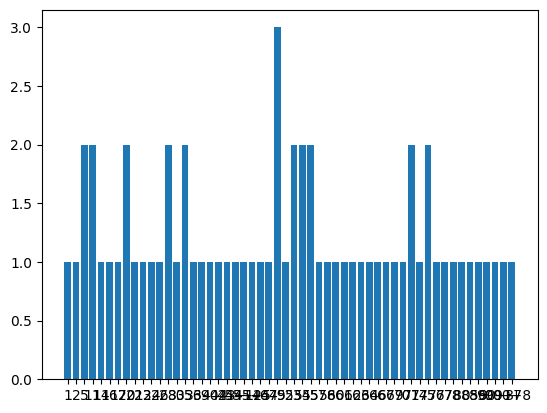

In [17]:
keys = goals_dict.keys()
vals = [len(val) for val in goals_dict.values()]
import matplotlib.pyplot as plt
plt.bar(keys, vals)


In [18]:
from decimal import Decimal

first_15_mins = (1, 16)
last_15_mins = (75, 91)

df = defaultdict(int)

for minute, goal in goals_dict.items():
    if "+" in minute:
        x, y = minute.split("+")
        minute = Decimal(".".join([x, y]))
    else:
        minute = int(minute)
    if minute > first_15_mins[0] and minute < first_15_mins[1]:
        df["first_15_mins"] += len(goal)
    elif minute > last_15_mins[0] and minute < last_15_mins[1]:
        df["last_15_mins"] += len(goal)
    else:
        df["remaining"] += len(goal)
df

defaultdict(int, {'remaining': 50, 'first_15_mins': 6, 'last_15_mins': 10})

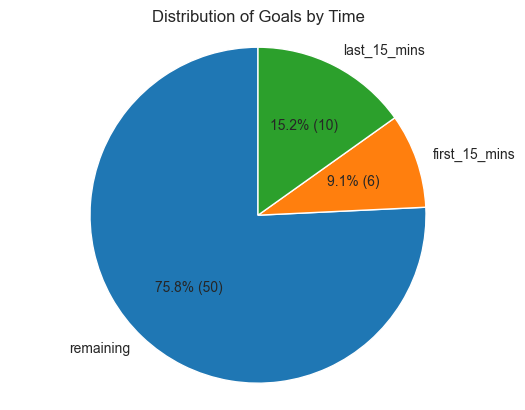

In [27]:
labels = list(df.keys())
sizes = list(df.values())

# create the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct=lambda x: f'{x:.1f}% ({int(round(x/100*sum(sizes)))})', startangle=90)
ax.axis('equal')

# add a title
ax.set_title('Distribution of Goals by Time')

# show the chart
plt.show()

In [23]:
sizes

[50, 6, 10]

In [25]:
int(sizes[0] / 100 * sum(sizes))

33